In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from plot_definition import create_folder

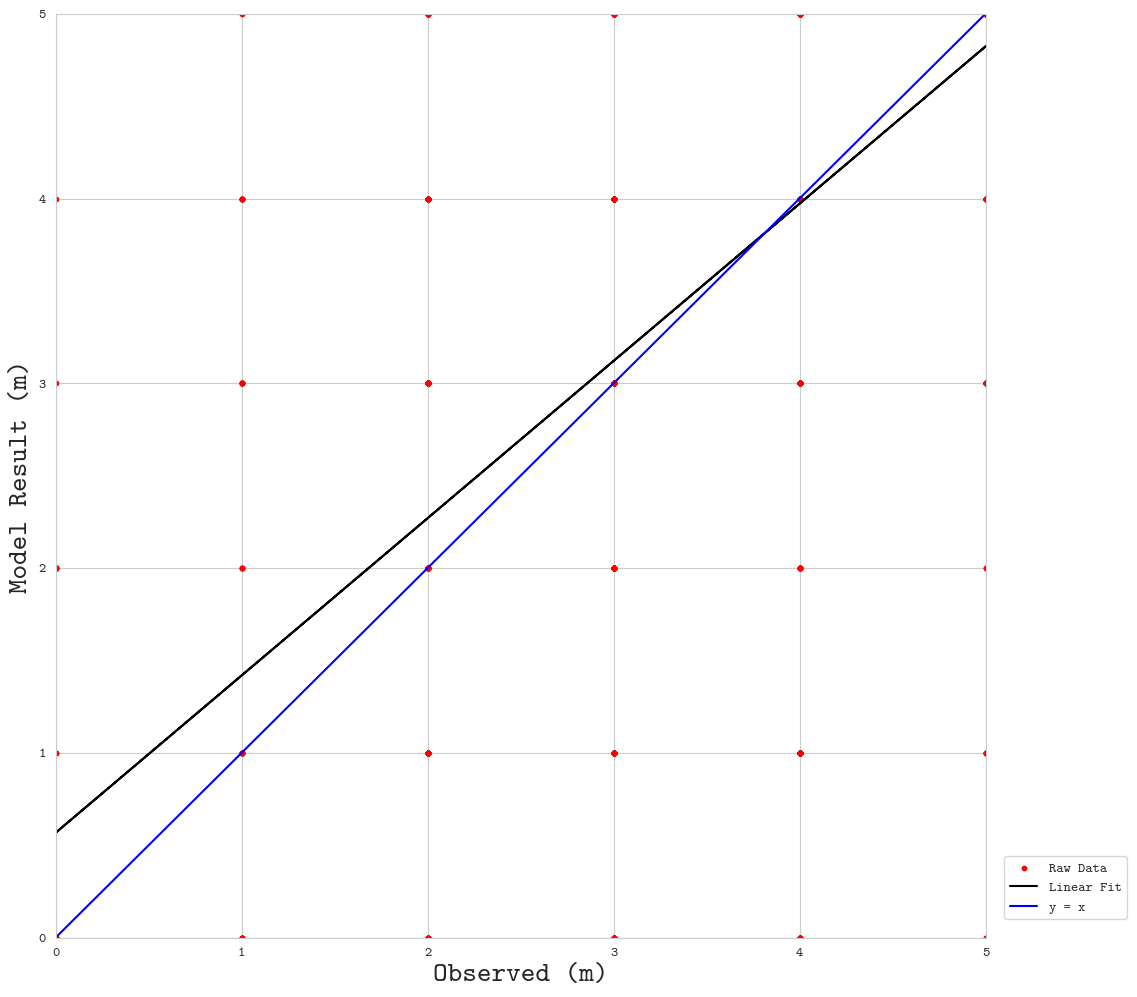

In [2]:
##### variables #####
data_type = "test"; predict_time = 1
save_path = "./result/"
file_name = f"scatter_{data_type}_{predict_time}"
temp_data_path = glob.glob(f"./datasets/test_1/*{data_type}*predict_{predict_time}*")[0]


##### import data #####
temp_data = pd.read_csv(temp_data_path, index_col = 0)
temp_x = temp_data.iloc[:,1]
temp_y = temp_data.iloc[:,0]


##### scatter image settings #####
plt.rcParams['font.family'] = "cmtt10"
plt.figure(figsize=(12, 12))
plt.scatter(temp_x, temp_y, s=10, marker="o", label="Raw Data", color='red')
plt.legend(loc=(1.02, 0.02))  # plt.legend(loc = 'best')
plt.xlabel("Observed (m)", fontsize=20)
plt.ylabel("Model Result (m)", fontsize=20)

##### draw linear fit line #####
linfit = np.polyfit(temp_x, temp_y, 1)
f_1d = np.poly1d(linfit)
plt.plot(temp_x, f_1d(temp_x), label="Linear Fit", color='black')

##### lable settings #####
temp_min = min(temp_x.min(), temp_y.min())
temp_max = max(temp_x.max(), temp_y.max())
plt.plot([temp_min, temp_max], [temp_min, temp_max], label="y = x", color='blue')

##### lable range settings #####
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.legend(loc=(1.02, 0.02))  # plt.legend(loc = 'best')


##### save image #####
try:
    plt.savefig(f"{save_path}{file_name}.png", bbox_inches = 'tight')
except:
    create_folder(save_path)
    plt.savefig(f"{save_path}{file_name}.png", bbox_inches = 'tight')

plt.show()